In [3]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATA_PATH = './data.json'

In [4]:
def load_data(data_path):
    with open(data_path, "r") as fp:
        data = json.load(fp)
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y

def prepare_datasets(test_size, validation_size):
    X, y = load_data(DATA_PATH)

    # split training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    # split training and validation sets
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    return X_train, X_validation, X_test, y_train, y_validation, y_test

def build_model(input_shape):
    # create model
    model = keras.Sequential()

    # 2 LSTM layers
    model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(keras.layers.LSTM(64))

    # dense layer
    model.add(keras.layers.Dense(64, activation="relu"))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    return model

def predict(model, X, y):
    X = X[np.newaxis, ...]
    # prediction is 2d array [[0.1, 0.2, ...]] for each genre for each sample
    prediction= model.predict(X)

    # extract index of max genre estimate
    predicted_index = np.argmax(prediction, axis=1)
    print("Expected index: {}, Predicted index: {}".format(y, predicted_index))

def plot_history(history):
    plt.close()
    fig, axs = plt.subplots(2)

    #create accuracy subplot
    axs[0].plot(history.history["accuracy"], label="train_accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test_accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy Eval")

    #create error subplot
    axs[1].plot(history.history["loss"], label="train_error")
    axs[1].plot(history.history["val_loss"], label="test_error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error Eval")

    plt.show()

Epoch 1/30
188/188 [==============================] - 25s 107ms/step - loss: 2.2144 - accuracy: 0.2015 - val_loss: 2.0643 - val_accuracy: 0.2917
Epoch 2/30
188/188 [==============================] - 21s 110ms/step - loss: 1.9538 - accuracy: 0.3150 - val_loss: 1.8029 - val_accuracy: 0.3431
Epoch 3/30
188/188 [==============================] - 17s 91ms/step - loss: 1.7693 - accuracy: 0.3657 - val_loss: 1.6675 - val_accuracy: 0.4032
Epoch 4/30
188/188 [==============================] - 16s 87ms/step - loss: 1.6683 - accuracy: 0.4063 - val_loss: 1.5941 - val_accuracy: 0.4146
Epoch 5/30
188/188 [==============================] - 17s 88ms/step - loss: 1.5872 - accuracy: 0.4420 - val_loss: 1.5053 - val_accuracy: 0.4559
Epoch 6/30
188/188 [==============================] - 16s 87ms/step - loss: 1.5160 - accuracy: 0.4640 - val_loss: 1.4689 - val_accuracy: 0.4680
Epoch 7/30
188/188 [==============================] - 16s 85ms/step - loss: 1.4642 - accuracy: 0.4836 - val_loss: 1.4316 - val_accurac

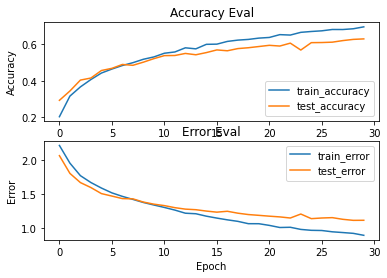

79/79 - 2s - loss: 1.1192 - accuracy: 0.6276 - 2s/epoch - 28ms/step
Accuracy on test set is {} 0.6275530457496643


In [5]:
# create train, validation, and test sets
X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)
# build the RNN
input_shape = (X_train.shape[1], X_train.shape[2]) # 130 10 sements, 13fccs
model = build_model(input_shape)

# compile the network
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=['accuracy'])

# train
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)
plot_history(history)

# evaluation
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Accuracy on test set is {}",format(test_accuracy))